
[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cfranklin2019\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


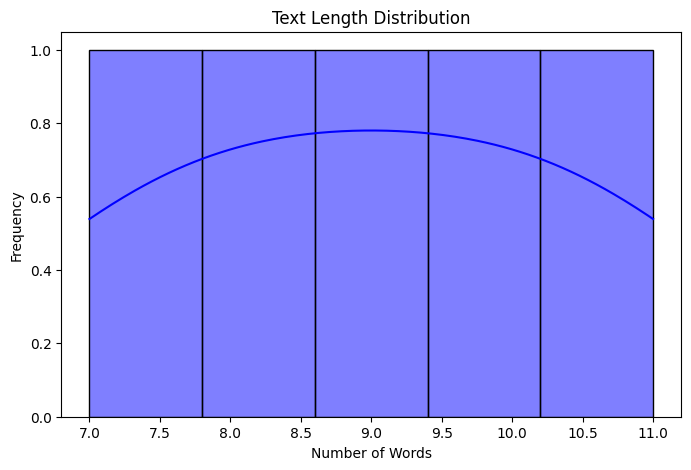

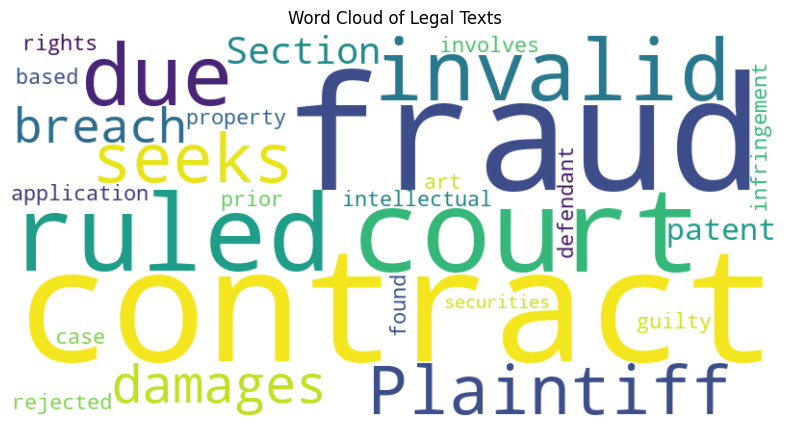

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [1]:
# Install required libraries if not already installed
!pip install pandas scikit-learn nltk matplotlib seaborn wordcloud

import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Sample Dataset (Replace this with real legal data)
data = {
    "text": [
        "The court ruled that the contract was invalid due to fraud.",
        "Plaintiff seeks damages for breach of contract under Section 5.",
        "The patent application was rejected based on prior art.",
        "This case involves intellectual property rights infringement.",
        "The defendant was found guilty of securities fraud."
    ],
    "label": ["Contract Law", "Contract Law", "Patent Law", "IP Law", "Securities Law"]
}

df = pd.DataFrame(data)

# Exploratory Data Analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=5, kde=True, color='blue')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Generate Word Cloud
text_corpus = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Legal Texts')
plt.show()

# Text Preprocessing Function
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

df["cleaned_text"] = df["text"].apply(clean_text)

# Convert labels to numerical values
df["label_num"] = df["label"].astype("category").cat.codes

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_text"], df["label_num"], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
